# Class 13 Linear Regression Notes

## Links & Resources

- [How to run Linear regression in Python scikit-Learn](https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/)


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [8]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Scikit Learn

In this section I am going to fit a linear regression model and predict the Boston housing prices. I will use the least squares method as the way to estimate the coefficients.


In [9]:
# Import linear regression for sci-kit learn module
# Drop the price column as we want only the parameters as X values
# Store Linear Regression object in a variable called lm

from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis=1)

# This creates a Linear Regression Object
lm = LinearRegression()
lm


LinearRegression()

# Important functions to keep in mind while fitting a linear regression model are

- lm.fit() -> fits a linear model
- lm.predict() -> Predict Y using the linear model with estimated coefficients
- lm.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model.

You can also explore the functions inside lm object by pressing lm.`<tab>`

- lm.coef_  - estimated coefficients
- lm.intercept_ - estimated intercepts


# Fitting a Linear Model

I am going to use all 13 parameters to fit a linear regression model. Two other parameters that you can pass to linear regression object are fit_intercept and normalize.


In [24]:

lm.fit(X, bos.PRICE)
LinearRegression(copy_X=True, fit_intercept=True, normalize=False)


LinearRegression()

In [11]:
print ('Estimated intercept coefficient: ', lm.intercept_)
print ('Number of Coefficients: ', len(lm.coef_))

Estimated intercept coefficient:  36.45948838508978
Number of Coefficients:  13


In [12]:
# Construct a data frame that contains features and estimated coefficients.

pd.DataFrame(zip(X.columns, lm.coef_), columns=['features', 'estimatedCoefficients'])


,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


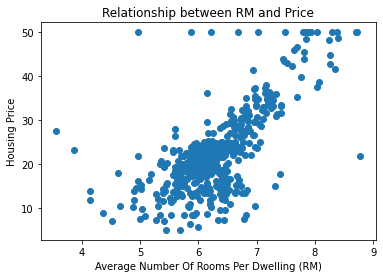

In [13]:
# As you can see from the data frame that there is a high correlation between RM and prices. Lets plot a scatter plot between True housing prices and True RM.

plt.scatter(bos.RM, bos.PRICE)
plt.xlabel('Average Number Of Rooms Per Dwelling (RM)')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and Price')
plt.show()

# Predicting Prices

I am going to calculate the predicted prices (Y^i) using lm.predict. Then I display the first 5 housing prices. These are my predicted housing prices.


In [14]:

lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

Text(0.5, 1.0, 'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

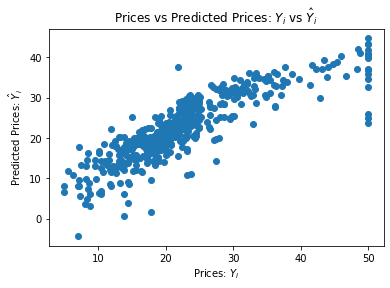

In [16]:
# Then I plot a scatter plot to compare true prices and the predicted prices.
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted Prices: $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$')

# You can notice that there is some error in the prediction as the housing prices increase.

In [18]:
# Lets calculate the mean squared error.

mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
mseFull

21.894831181729202

In [20]:
# But if you fit linear regression for one feature the error will be very high. Lets take the feature ‘PTRATIO’ and calculate the mean squared error.

lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)
LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

LinearRegression()

In [22]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
msePTRATIO

# The mean squared error has increased. So this shows that a single feature is not a good predictor of housing prices.

62.652200013769274

# Training and validation data sets

In practice you wont implement linear regression on the entire data set, you will have to split the data sets into training and test data sets. So that you train your model on training data and see how well it performed on test data

You have to divide your data sets randomly. Scikit learn provides a function called train_test_split to do this.


In [25]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, bos.PRICE, test_size=0.33, random_state=5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [27]:
# Build a linear regression model using my train-test data sets.
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

# Then I calculate the mean squared error for training and test data.
print ('Fit a model X_train, and calculate MSE with Y_train: ', np.mean((Y_train - lm.predict(X_train)) ** 2))
print ('Fit a model X_train, and calculate MSE with X_test, Y_test: ', np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train:  19.546758473534666
Fit a model X_train, and calculate MSE with X_test, Y_test:  28.530458765974597


# Residual Plots

Residual plots are a good way to visualize the errors in your data. If you have done a good job then your data should be randomly scattered around line zero. If you see structure in your data, that means your model is not capturing some thing. Maye be there is a interaction between 2 variables that you are not considering, or may be you are measuring time dependent data. If you get some structure in your data, you should go back to your model and check whether you are doing a good job with your parameters.


Text(0, 0.5, 'Residuals')

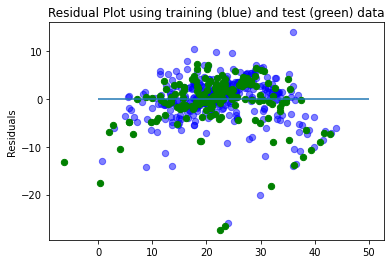

In [28]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

# Recap

- explored the boston data set and then renamed its column names
- explored the boston data set using .DESCR, my goal was to predict the housing prices using the given features
- used Scikit learn to fit linear regression to the entire data set and calculated the mean squared error
- made a train-test split and calculated the mean squared error for my training data and test data
- plotted the residuals for my training and test datasets
